In [1]:
import os
import re
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Record counts and database names
record_counts = [1000, 10000, 100000, 500000]
databases = ["redis", "memcached", "postgresql"]
workload = "c"
input_dir = "./run"  # Directory containing result files
output_dir = "./plots"
colors = ['red', 'green', 'lightblue']  # Lighter blue for PostgreSQL

# Initialize dictionaries to store results
runtime_data = {db: [] for db in databases}
read_latency_data = {db: [] for db in databases}

In [8]:
# Parse files and collect data
for db in databases:
    runtime_data[db] = []
    read_latency_data[db] = []
    for record_count in record_counts:
        file_name = f"run_{db}_{record_count}_workload{workload}.txt"
        file_path = os.path.join(input_dir, file_name)
        with open(file_path, "r") as file:
            content = file.read()
            # Extract metrics using regex
            runtime_match = re.search(r"\[OVERALL\], RunTime\(ms\), ([0-9]+)", content)
            read_latency_match = re.search(r"\[READ\], AverageLatency\(us\), ([0-9.]+)", content)
            
            # Store extracted values with default handling for missing matches
            runtime = int(runtime_match.group(1)) if runtime_match else 0
            read_latency = float(read_latency_match.group(1)) if read_latency_match else 0.0
            
            # Append to respective lists
            runtime_data[db].append(runtime)
            read_latency_data[db].append(read_latency)

In [9]:
# Function to create bar plots
def plot_metric(metric_dict, metric_name, ylabel, file_name):
    x = np.arange(len(record_counts))  # X-axis positions for record counts
    bar_width = 0.2  # Width of each bar

    plt.figure(figsize=(10, 6))
    # Loop through databases and plot bars for each
    for i, db in enumerate(databases):
        plt.bar(x + i * bar_width, metric_dict[db], bar_width, label=db, color=colors[i])

    # Add labels, title, and grid
    plt.xticks(x + bar_width, record_counts)
    plt.xlabel("recordcount", fontsize=12)
    plt.ylabel(ylabel, fontsize=12)
    plt.title(f"Workload {workload} - {metric_name}", fontweight='bold', fontsize=14)
    plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    
    # Save or display the plot
    plot_file_name = f"workload{workload}_{file_name}.png"
    plt.savefig(os.path.join(output_dir, plot_file_name))
    plt.show()
    plt.close()

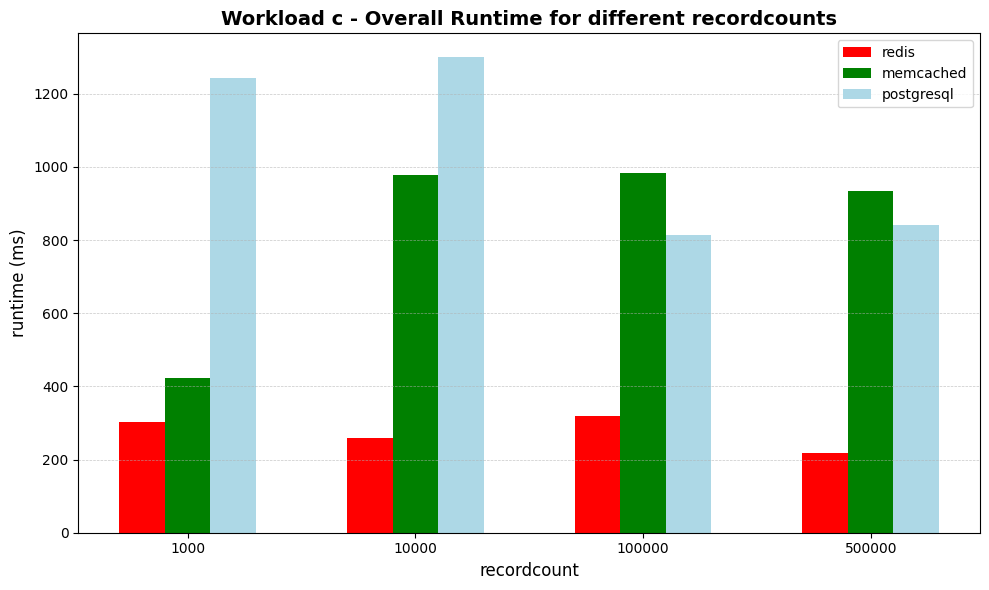

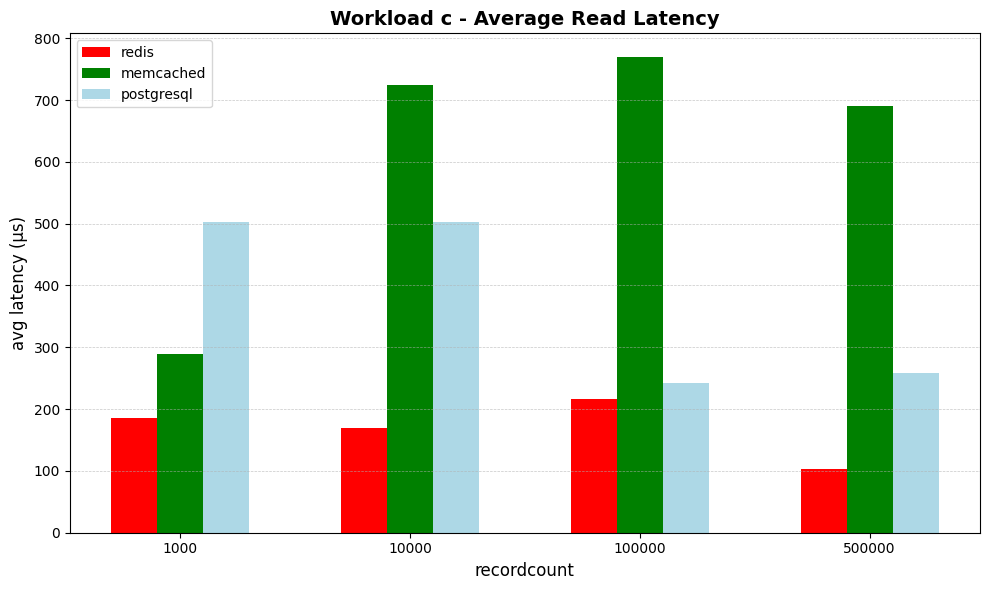

In [10]:
# Generate plots
plot_metric(runtime_data, "Overall Runtime for different recordcounts", "runtime (ms)", "overall_runtime")
plot_metric(read_latency_data, "Average Read Latency", "avg latency (µs)", "average_read_latency")